# Data Processing``

### Importing required tools 

In [56]:
from os import path, listdir
from IPython.display import display as disp
import numpy as np 
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

### Data Processing Steps 

1. Raw Data Collection 
2. Raw Data Correction
3. Intermediate Data : Box information(Bx,By,Bh,Bw)
4. Classes Encoding(sign : 1, others : 0 ||  amount : 1, others : 0)
5. Data Orientation(4*(1+4+4)=36 +1 = 37 column)
6. Data Normalisation

In [57]:
# # Raw Data Extraction tool 
# from collection_and_process.dataCollector import extract_data_in_loop

### Raw Data Correction

|X|Y|
|------|------|
|Ax=Dx | Ay=By|
|Bx=Cx | Cy=Dy|

In [58]:
raw_data_path = "./csv/"
df_list = [pd.read_csv(path.join(raw_data_path,file)) for file in listdir(raw_data_path)]
raw_df=pd.concat(df_list, ignore_index=True)
raw_df.head(10)

,FileName,IMG_HEIGHT,IMG_WIDTH,ClassName,P,Ax,Ay,Bx,By,Cx,Cy,Dx,Dy
0,X_000.jpeg,930,2240,Signature,1,1290.0,648.0,2030.0,660.0,2042.0,840.0,1302.0,849.0
1,X_000.jpeg,930,2240,Date,1,1433.0,227.0,1755.0,226.0,1755.0,294.0,1426.0,294.0
2,X_000.jpeg,930,2240,Amount,1,1785.0,339.0,2072.0,338.0,2074.0,408.0,1783.0,408.0
3,X_000.jpeg,930,2240,AcNo,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,X_001.jpeg,853,2240,Signature,1,1477.0,529.0,2149.0,534.0,2163.0,771.0,1486.0,768.0
5,X_001.jpeg,853,2240,Date,1,1757.0,183.0,1955.0,182.0,1955.0,229.0,1757.0,234.0
6,X_001.jpeg,853,2240,Amount,1,1946.0,400.0,2177.0,404.0,2182.0,452.0,1946.0,453.0
7,X_001.jpeg,853,2240,AcNo,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,X_002.jpeg,823,2240,Signature,1,1444.0,511.0,1892.0,512.0,1895.0,674.0,1433.0,677.0
9,X_002.jpeg,823,2240,Date,1,1335.0,210.0,1825.0,210.0,1822.0,262.0,1332.0,268.0


In [73]:
corrected_df = raw_df.iloc[:,:5]
corrected_df['Ax'] = (raw_df.Ax+raw_df.Dx)/2
corrected_df['Ay'] = (raw_df.By+raw_df.Ay)/2
corrected_df['Cx'] = (raw_df.Bx+raw_df.Cx)/2
corrected_df['Cy'] = (raw_df.Cy+raw_df.Dy)/2

corrected_df.head()

,FileName,IMG_HEIGHT,IMG_WIDTH,ClassName,P,Ax,Ay,Cx,Cy
0,X_000.jpeg,930,2240,Signature,1,1296.0,654.0,2036.0,844.5
1,X_000.jpeg,930,2240,Date,1,1429.5,226.5,1755.0,294.0
2,X_000.jpeg,930,2240,Amount,1,1784.0,338.5,2073.0,408.0
3,X_000.jpeg,930,2240,AcNo,0,-1.0,-1.0,-1.0,-1.0
4,X_001.jpeg,853,2240,Signature,1,1481.5,531.5,2156.0,769.5


### Box Information Data generation

In [ ]:
intermediate_df = corrected_df.iloc[:,:5]
Cx,Ax,Cy,Ay = corrected_df.Cx, corrected_df.Ax, corrected_df.Cy, corrected_df.Ay
intermediate_df['Bx'] = (Cx+Ax)/2 # Simplyfing Ax+(Cx-Ax)/2
intermediate_df['By'] = (Cy+Ay)/2 # Simplyfing Ay+(Cy-Ay)/2
intermediate_df['Bw'] = np.abs(Cx-Ax)
intermediate_df['Bh'] = np.abs(Cy-Ay)

intermediate_df.head(10)

,FileName,IMG_HEIGHT,IMG_WIDTH,ClassName,P,Bx,By,Bw,Bh
0,X_000.jpeg,930,2240,Signature,1,1666.00,749.25,740.0,190.5
1,X_000.jpeg,930,2240,Date,1,1592.25,260.25,325.5,67.5
2,X_000.jpeg,930,2240,Amount,1,1928.50,373.25,289.0,69.5
3,X_000.jpeg,930,2240,AcNo,0,-1.00,-1.00,0.0,0.0
4,X_001.jpeg,853,2240,Signature,1,1818.75,650.50,674.5,238.0
5,X_001.jpeg,853,2240,Date,1,1856.00,207.00,198.0,49.0
6,X_001.jpeg,853,2240,Amount,1,2062.75,427.25,233.5,50.5
7,X_001.jpeg,853,2240,AcNo,0,-1.00,-1.00,0.0,0.0
8,X_002.jpeg,823,2240,Signature,1,1666.00,593.50,455.0,164.0
9,X_002.jpeg,823,2240,Date,1,1578.50,237.50,490.0,55.0


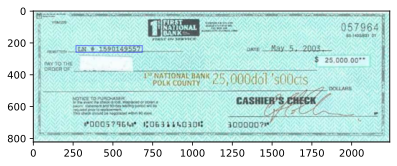

In [65]:
image_dir="../../X/"
index = 11
img = cv.imread(path.join(image_dir,intermediate_df.FileName[index]))
bx,by,bw,bh = intermediate_df.iloc[index,5:]
cv.rectangle(img,(int(bx-bw/2),int(by-bh/2)),(int(bx+bw/2),int(by+bh/2)) ,(0,0,255),2)
plt.imshow(img)


### Classes Encoding 

In [76]:
class_encoded_df=pd.get_dummies(intermediate_df,columns=["ClassName"],prefix="",prefix_sep='')
class_encoded_df.head(10)

,FileName,IMG_HEIGHT,IMG_WIDTH,P,Bx,By,Bw,Bh,AcNo,Amount,Date,Signature
0,X_000.jpeg,930,2240,1,1666.00,749.25,740.0,190.5,0,0,0,1
1,X_000.jpeg,930,2240,1,1592.25,260.25,325.5,67.5,0,0,1,0
2,X_000.jpeg,930,2240,1,1928.50,373.25,289.0,69.5,0,1,0,0
3,X_000.jpeg,930,2240,0,-1.00,-1.00,0.0,0.0,1,0,0,0
4,X_001.jpeg,853,2240,1,1818.75,650.50,674.5,238.0,0,0,0,1
5,X_001.jpeg,853,2240,1,1856.00,207.00,198.0,49.0,0,0,1,0
6,X_001.jpeg,853,2240,1,2062.75,427.25,233.5,50.5,0,1,0,0
7,X_001.jpeg,853,2240,0,-1.00,-1.00,0.0,0.0,1,0,0,0
8,X_002.jpeg,823,2240,1,1666.00,593.50,455.0,164.0,0,0,0,1
9,X_002.jpeg,823,2240,1,1578.50,237.50,490.0,55.0,0,0,1,0


### Data Normalaization 

In [77]:
normalaized_df = class_encoded_df

### Data Orientation Related to 4 objects 

In [113]:
columns = [f"obj{j}_{i}" for j in range(4) for i in normalaized_df.columns[3:] ]
disp(len(columns))
oriented_df=pd.DataFrame(columns=columns)
for i,name in enumerate(normalaized_df.FileName.unique()):    
    oriented_df.loc[i]=np.array(
        normalaized_df[normalaized_df.FileName == name].iloc[:,3:]
    ).reshape(-1)
    
oriented_df

36

,obj0_P,obj0_Bx,obj0_By,obj0_Bw,obj0_Bh,obj0_AcNo,obj0_Amount,obj0_Date,obj0_Signature,obj1_P,...,obj2_Signature,obj3_P,obj3_Bx,obj3_By,obj3_Bw,obj3_Bh,obj3_AcNo,obj3_Amount,obj3_Date,obj3_Signature
0,1.0,1666.00,749.25,740.0,190.5,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,-1.00,-1.00,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1818.75,650.50,674.5,238.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,-1.00,-1.00,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1666.00,593.50,455.0,164.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,476.50,240.25,417.0,42.5,1.0,0.0,0.0,0.0
3,1.0,1785.75,687.75,656.5,207.5,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,348.75,683.00,198.5,54.0,1.0,0.0,0.0,0.0
4,1.0,1696.75,701.50,668.5,153.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,-1.00,-1.00,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,1552.50,597.50,575.0,227.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,-1.00,-1.00,0.0,0.0,1.0,0.0,0.0,0.0
6,1.0,1826.50,659.75,564.0,158.5,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,-1.00,-1.00,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,1488.75,607.50,552.5,180.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,-1.00,-1.00,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,1627.00,599.50,570.0,127.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,471.25,543.25,399.5,55.5,1.0,0.0,0.0,0.0
9,1.0,2016.50,728.25,274.0,148.5,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,389.50,541.50,523.0,67.0,1.0,0.0,0.0,0.0
